# Student spending Habit Data Analysis

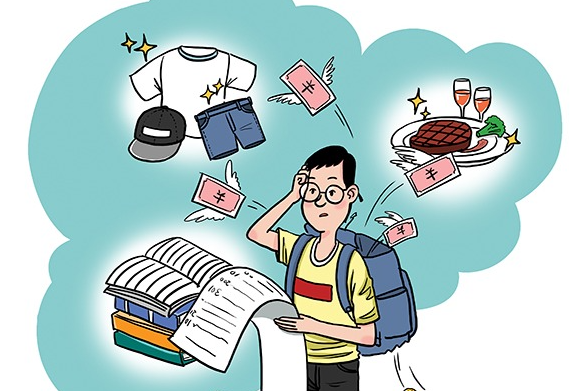

In [1]:
# importing dependecies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing Dataset
df = pd.read_csv('student_spending.csv')
sns.set()

In [4]:
#Data Overview
df.head()

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [8]:
#Dropping Unnamed: 0 column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
df.head()

,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [10]:
# Column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   object
 2   year_in_school            1000 non-null   object
 3   major                     1000 non-null   object
 4   monthly_income            1000 non-null   int64 
 5   financial_aid             1000 non-null   int64 
 6   tuition                   1000 non-null   int64 
 7   housing                   1000 non-null   int64 
 8   food                      1000 non-null   int64 
 9   transportation            1000 non-null   int64 
 10  books_supplies            1000 non-null   int64 
 11  entertainment             1000 non-null   int64 
 12  personal_care             1000 non-null   int64 
 13  technology                1000 non-null   int64 
 14  health_wellness          

In [11]:
# Row/Column
df.shape

(1000, 17)

In [12]:
#Null check
df.isnull().sum()

age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
dtype: int64

In [13]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [14]:
# Statistical Overview
df.describe()

,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000
std,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221
min,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000
25%,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000
50%,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000
75%,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000
max,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000


# Expolaratory Data Analysis

In [18]:
#Gender distribution in the data sample
df1 = df['gender'].value_counts()
df1

gender
Male          356
Female        323
Non-binary    321
Name: count, dtype: int64

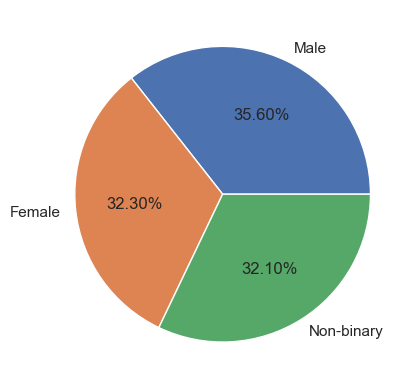

In [21]:
df1.plot(kind = 'pie', autopct = '%1.2f%%')
plt.ylabel(None)
plt.show()

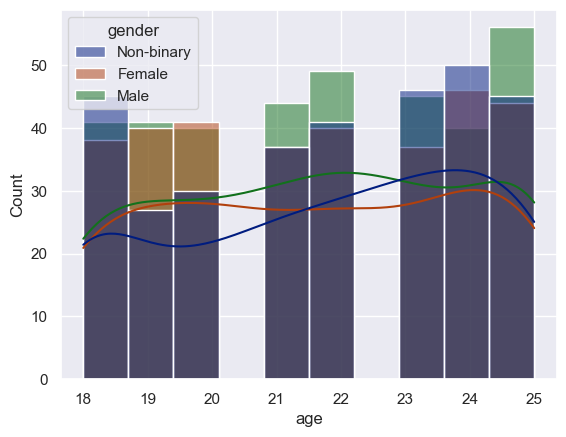

In [32]:
#Overall Age distribution Gender wise
sns.histplot(x = 'age', data =df, bins = 10, kde = True, hue = 'gender', palette = 'dark')
plt.show()

In [34]:
# Yers in school
df3 = df['year_in_school'].value_counts()
df3

year_in_school
Senior       254
Freshman     253
Junior       247
Sophomore    246
Name: count, dtype: int64

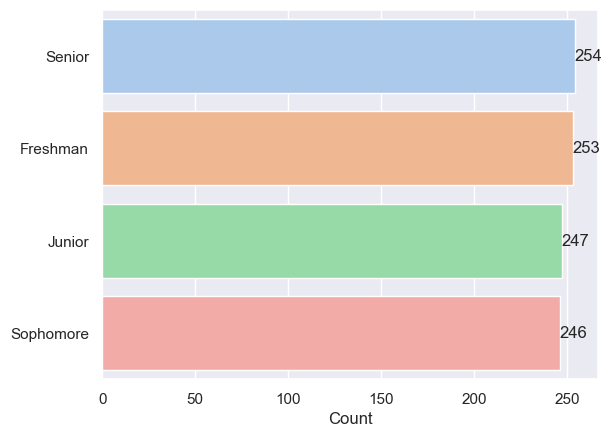

In [69]:
ax = sns.barplot(x = df3.values, y = df3.index, palette = 'pastel')
ax.bar_label(ax.containers[0])
plt.ylabel(None)
plt.xlabel('Count')
plt.show()

In [41]:
#Major wise
df4 = df['major'].value_counts()
df4

major
Biology             228
Economics           204
Computer Science    192
Engineering         192
Psychology          184
Name: count, dtype: int64

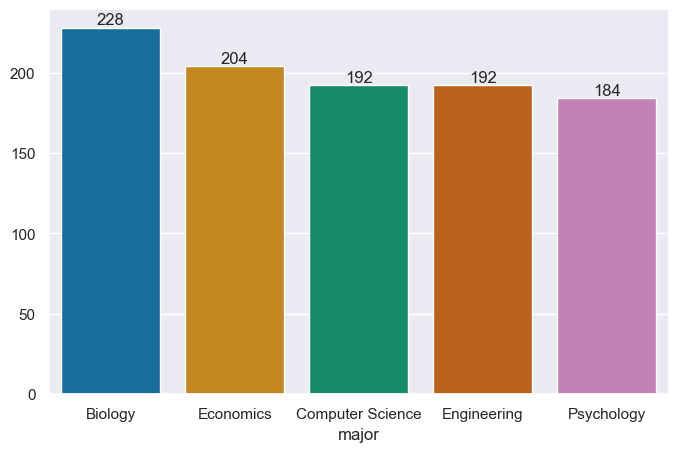

In [68]:
plt.figure(figsize = (8,5))
ax = sns.barplot(x = df4.index, y = df4.values, palette = 'colorblind')
ax.bar_label(ax.containers[0])
plt.show()

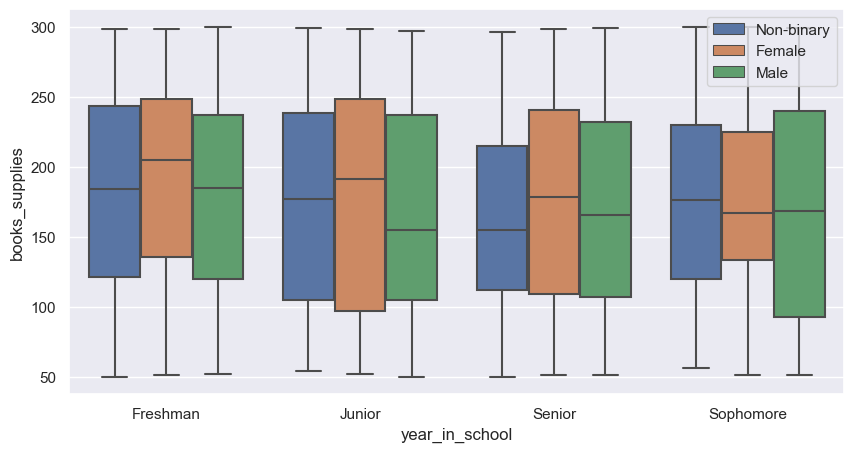

In [72]:
#Financial aid
plt.figure(figsize = (10,5))
sns.boxplot(x = 'year_in_school', y = 'books_supplies', hue = 'gender', data = df)
plt.legend(loc='upper right')
plt.show()

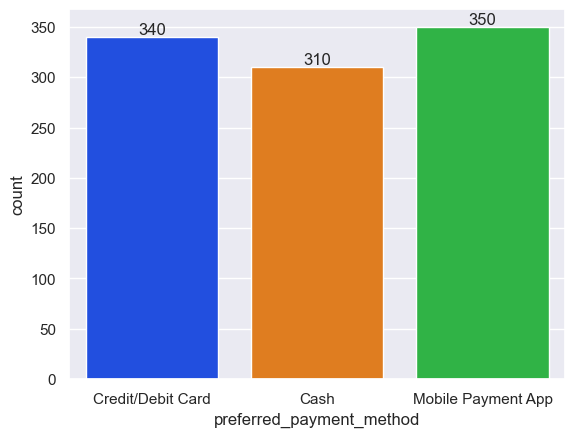

In [67]:
#Payment mode preference
ax = sns.countplot(x='preferred_payment_method', data=df, palette= 'bright')
ax.bar_label(ax.containers[0])
plt.show()

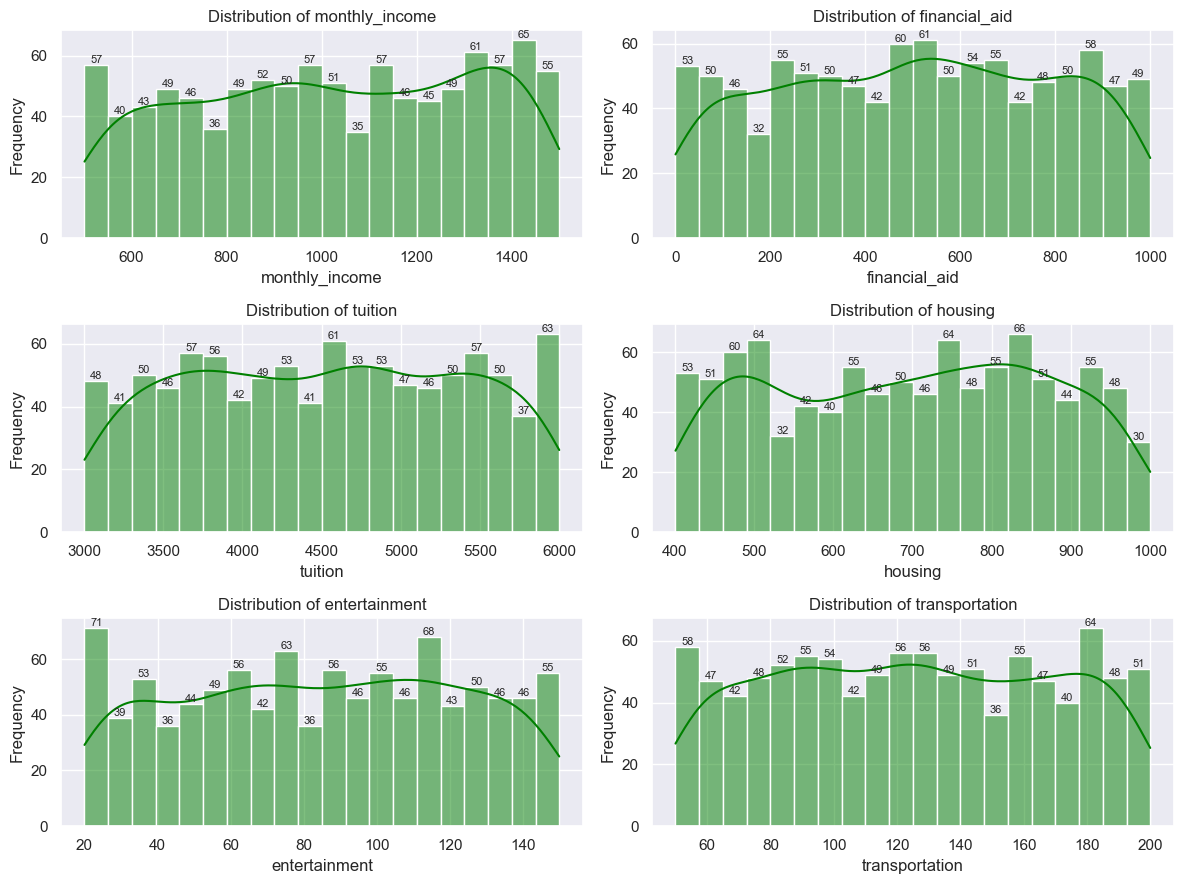

In [76]:
# Histogram plot for monthly_income', 'financial_aid', 'tuition', 'housing', 'entertainment', 'transportation' distribution

selected_columns = ['monthly_income', 'financial_aid', 'tuition', 'housing', 'entertainment', 'transportation']

# Determine the number of rows and columns for subplots
num_rows = len(selected_columns) // 2 + len(selected_columns) % 2
num_cols = 2

# Set up subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i], color='green')
    
    # Add numbers on top of each bar
    for rect in axes[i].patches:
        height = rect.get_height()
        axes[i].text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8)

    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

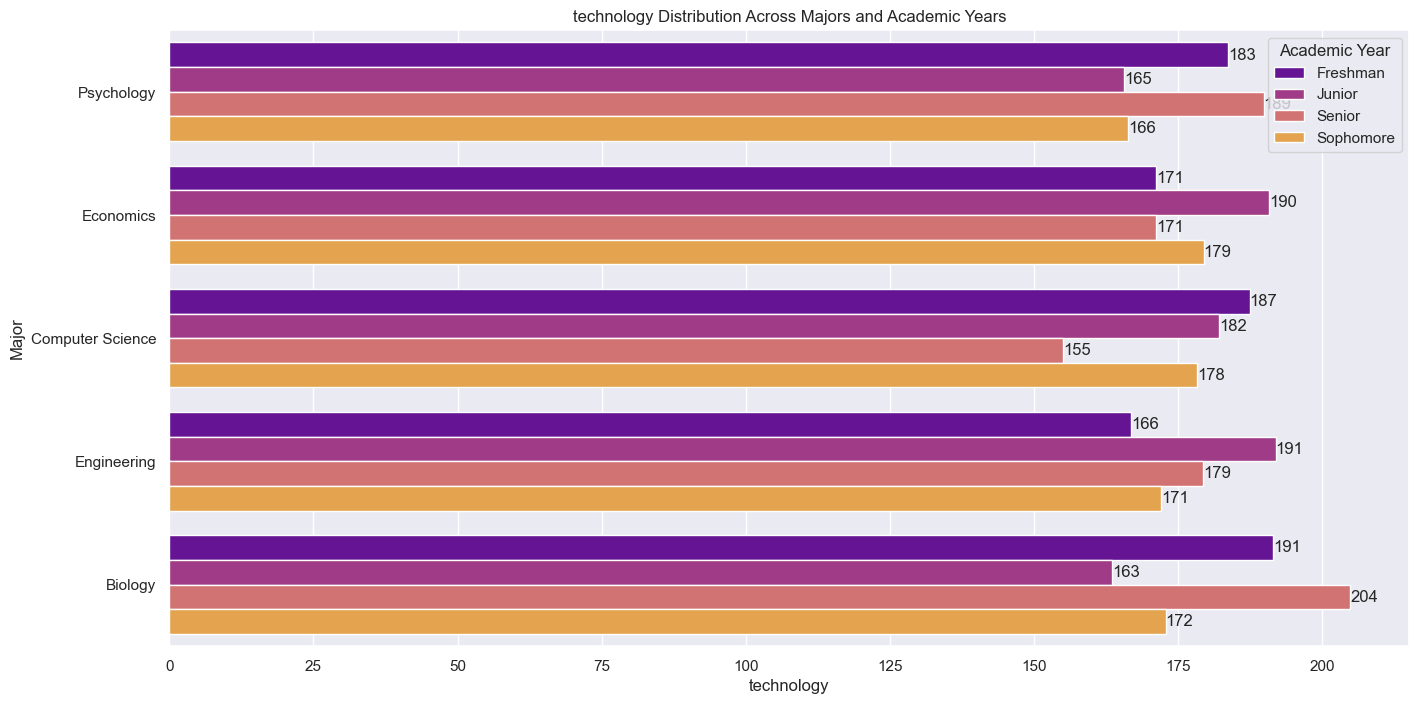

In [92]:
#technology Distribution Across Majors and Academic Years
selected_columns = ['technology', 'major', 'year_in_school']

# Filter the DataFrame for non-null values in the selected columns
filtered_df = df[selected_columns].dropna()

# Set up the bar plot
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='technology', y='major', hue='year_in_school', data=filtered_df, ci=None, palette='plasma')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Set plot title and labels
plt.title('technology Distribution Across Majors and Academic Years')
plt.xlabel('technology')
plt.ylabel('Major')

# Display the legend
plt.legend(title='Academic Year')

# Show the plot
plt.show()

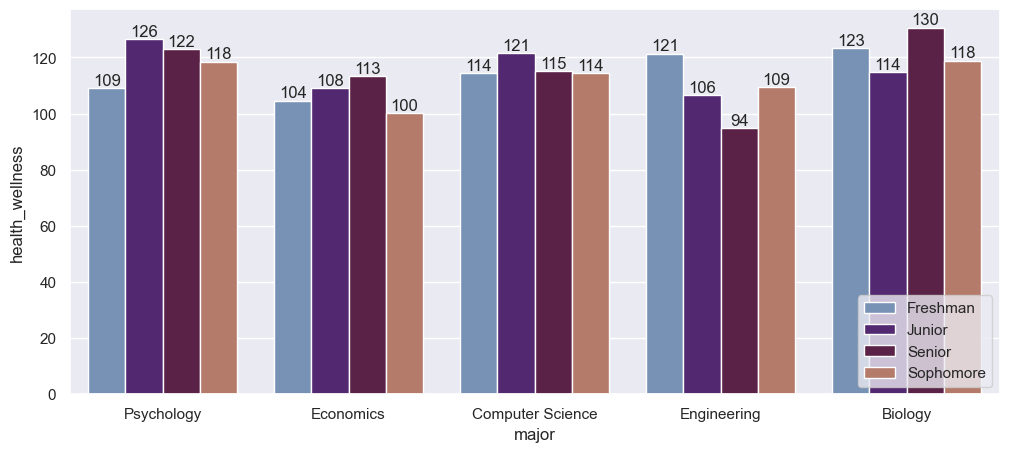

In [93]:
#Health Wellness spending distribution
plt.figure(figsize = (12,5))
ax = sns.barplot(x = 'major', y = 'health_wellness', hue = 'year_in_school', data = df, ci = None, palette = 'twilight')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.legend(loc='lower right')
plt.show()

# Correlation Analysis

In [94]:
from sklearn.preprocessing import LabelEncoder

In [96]:
df_copy = df.copy()

# Initialize LabelEncoder from scikit-learn
label_encoder = LabelEncoder() 
# List of categorical columns to be encoded
categorical_columns = ['gender', 'year_in_school', 'major', 'preferred_payment_method'] 

# Apply LabelEncoder to each categorical column in the copied dataset
for column in categorical_columns: 
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

In [97]:
# Calculate the correlation matrix for the encoded dataset
correlation_matrix = df_copy.corr() 

In [99]:
print(correlation_matrix)

                               age    gender  year_in_school     major  \
age                       1.000000  0.028100        0.055227  0.012231   
gender                    0.028100  1.000000       -0.012286 -0.043070   
year_in_school            0.055227 -0.012286        1.000000 -0.004163   
major                     0.012231 -0.043070       -0.004163  1.000000   
monthly_income           -0.015448  0.008636       -0.058961  0.020778   
financial_aid            -0.022263 -0.018788       -0.019791 -0.025996   
tuition                   0.037042  0.013690       -0.006664  0.048675   
housing                   0.023288  0.000124       -0.069815 -0.028234   
food                      0.029906  0.034546        0.005258  0.022010   
transportation           -0.015375 -0.024264        0.026708 -0.000370   
books_supplies            0.025567 -0.024976       -0.042306 -0.022125   
entertainment             0.060446  0.018671       -0.015079 -0.006878   
personal_care            -0.052414 -0.

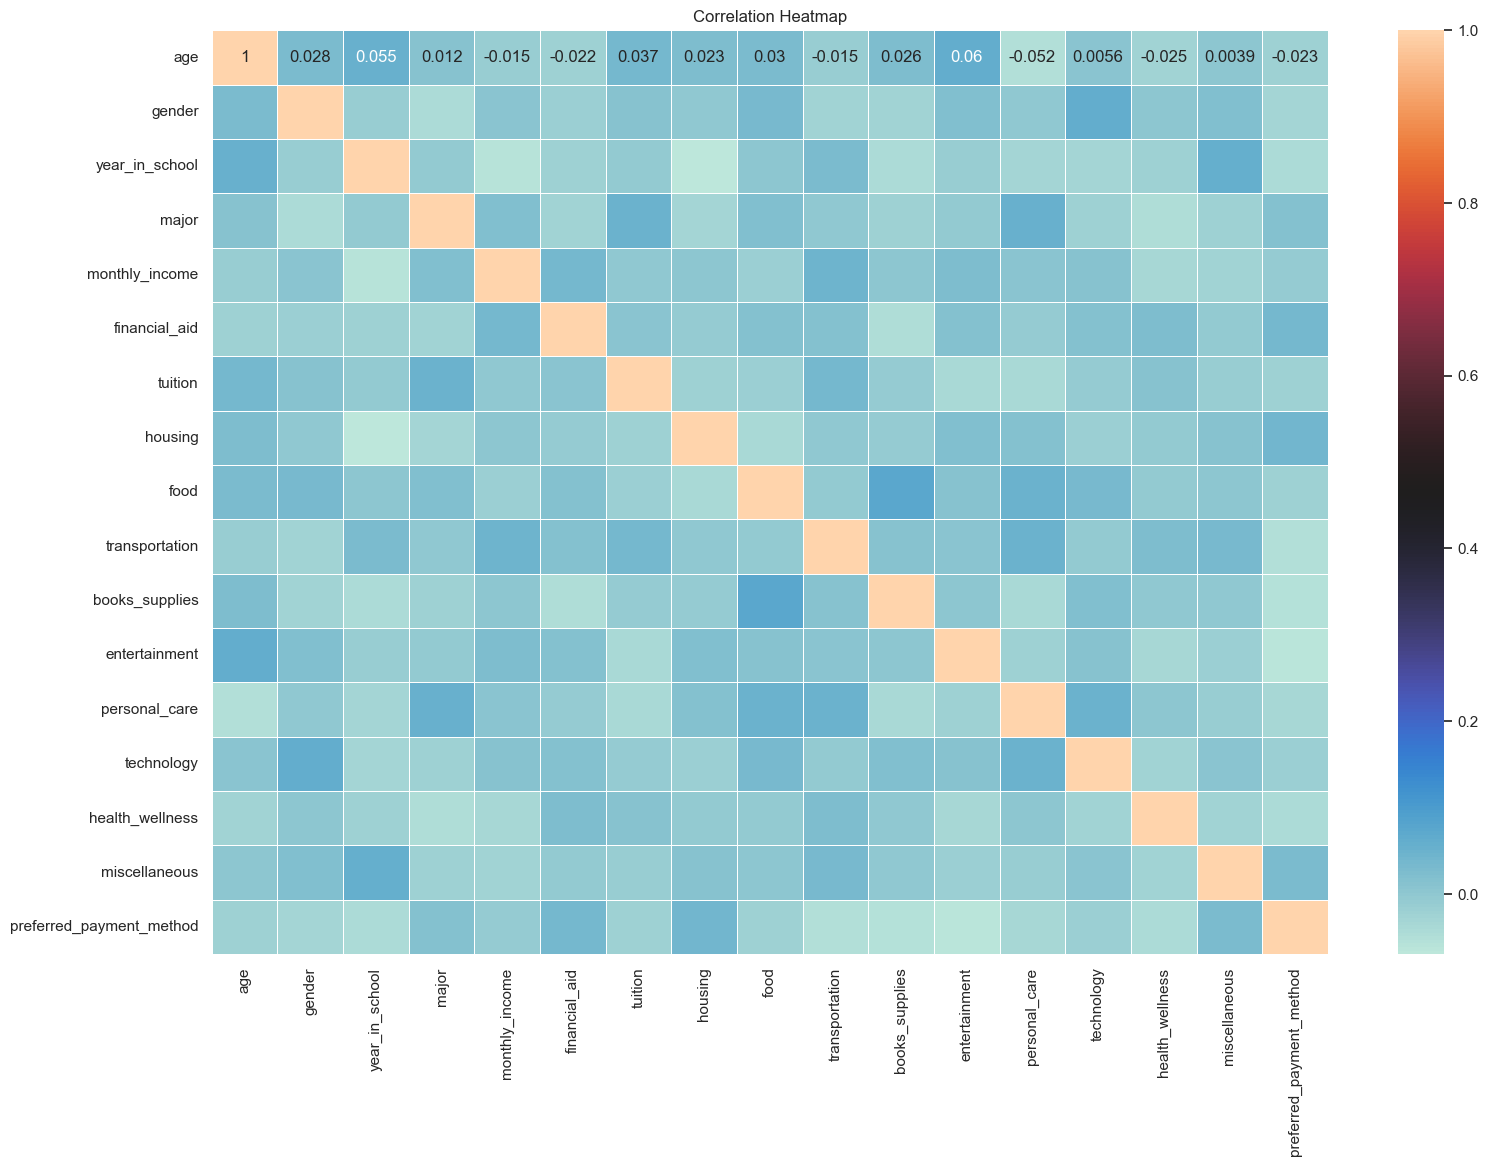

In [104]:
# Plot the correlation heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, cmap='icefire', linewidths=0.5 , annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Observations

Upon closer scrutiny, it's evident that housing holds considerable sway over the favored payment method, whereas elements like monthly earnings have a negligible effect. Intriguingly, entertainment spending exhibits a notable adverse influence on payment preferences. These revelations prompt thought-provoking inquiries, encouraging a deeper exploration into the underlying dynamics driving these observed trends.